# Sales Trend Over Time
- Identify sales trends over months and years
- Compare how sales are trended by each year
- Key Metrics: `SalesAmount` or `TotalCost` aggregated by `Year` or `Month`.

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Loading data

In [2]:
# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from ContosoRetail_df"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='SalesKey')
 
# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\duyvn\AppData\Local\Temp\ipykernel_10368\1552611109.py:2: SyntaxWarning: invalid escape sequence '\S'
  server = 'DESKTOP-D57LVN9\SQLEXPRESS'


### Metrics aggregation

In [3]:
# Extracting data
df_trend = df_origin[['DateKey','SalesAmount','TotalCost']].copy()

# Create month and year columns
df_trend['Year'] = df_trend['DateKey'].dt.year
df_trend['Month'] = df_trend['DateKey'].dt.month

# Metrics aggregation
df_pivot_sales = df_trend.pivot_table(index='Month', columns='Year', values='SalesAmount', aggfunc='sum')
df_pivot_cost = df_trend.pivot_table(index='Month', columns='Year', values='TotalCost', aggfunc='sum')

# Convert month num to month name
df_pivot_sales = df_pivot_sales.reset_index()
df_pivot_sales['Month'] = df_pivot_sales['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot_sales = df_pivot_sales.set_index('Month')

df_pivot_cost = df_pivot_cost.reset_index()
df_pivot_cost['Month'] = df_pivot_cost['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot_cost = df_pivot_cost.set_index('Month')

In [4]:
df_pivot_sales

Year,2022,2023,2024
Month,,,
Jan,2.698353e+08,2.794608e+08,2.697703e+08
Feb,2.982160e+08,2.789759e+08,2.758794e+08
Mar,3.004869e+08,2.900606e+08,2.707700e+08
Apr,4.001603e+08,3.561392e+08,3.091578e+08
May,4.234291e+08,3.510970e+08,3.415603e+08
Jun,4.097975e+08,3.381328e+08,3.313000e+08
Jul,3.896174e+08,3.860242e+08,3.333744e+08
Aug,3.884298e+08,3.599382e+08,3.250303e+08
Sep,3.791446e+08,3.534220e+08,3.137803e+08


In [5]:
df_pivot_cost

Year,2022,2023,2024
Month,,,
Jan,1.173994e+08,1.218065e+08,1.189806e+08
Feb,1.298679e+08,1.209486e+08,1.205015e+08
Mar,1.316055e+08,1.258102e+08,1.175797e+08
Apr,1.730078e+08,1.536153e+08,1.322483e+08
May,1.823112e+08,1.502414e+08,1.451851e+08
Jun,1.760910e+08,1.442633e+08,1.405778e+08
Jul,1.678775e+08,1.657740e+08,1.454401e+08
Aug,1.659805e+08,1.552109e+08,1.410453e+08
Sep,1.619729e+08,1.517612e+08,1.360774e+08


### Visualizing results

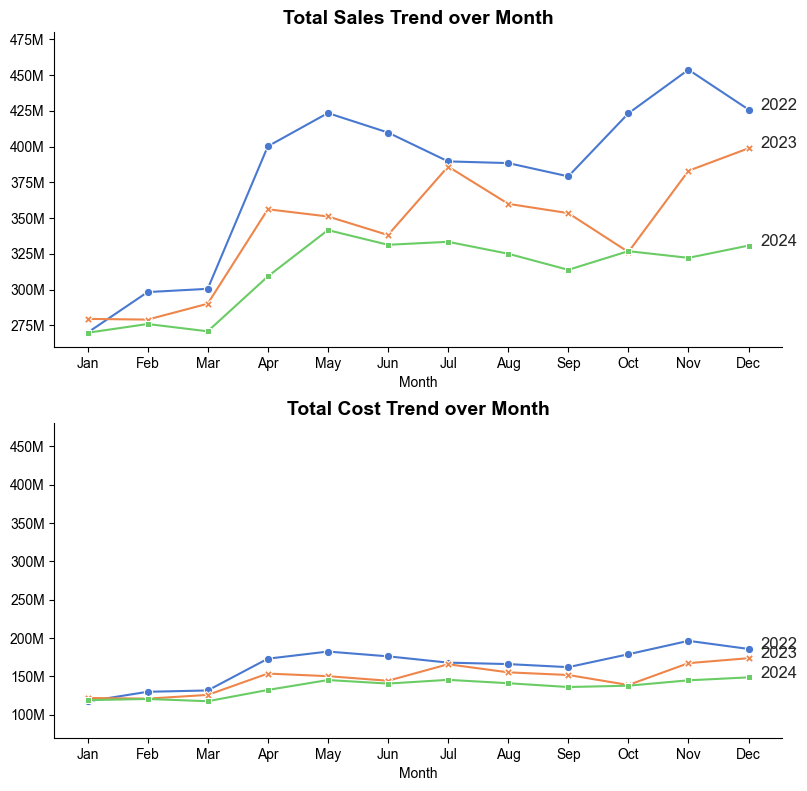

In [6]:
# Subplots
fig, ax = plt.subplots(2,1, figsize=(8,8))

# Plotting
sns.set_theme(style='ticks')
sns.lineplot(
    data=df_pivot_sales,
    ax=ax[0],
    dashes=False,
    markers=True,
    legend=False,
    palette='muted'
)
sns.lineplot(
    data=df_pivot_cost,
    ax=ax[1],
    dashes=False,
    markers=True,
    legend=False,
    palette='muted'
)
sns.despine()

# Formatting plot
fig.tight_layout()

ax[0].set_title('Total Sales Trend over Month', fontsize=14, fontweight='bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))
ax[0].set_ylim(260000000,480000000)

ax[1].set_title('Total Cost Trend over Month', fontsize=14, fontweight='bold')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))
ax[1].set_ylim(70000000,480000000)

# Labeling
for i in range(3):
    ax[0].text(11.2, y=df_pivot_sales.iloc[-1,i], s=df_pivot_sales.columns[i])
    ax[1].text(11.2, y=df_pivot_cost.iloc[-1,i], s=df_pivot_cost.columns[i])

plt.show()

### General insights
- Profitability Analysis Needed: Since the sales trend varies significantly while costs remain flat, it would be crucial to compute profits (Sales - Costs) for a deeper understanding of business performance.

- Year-on-Year Performance: 2022 was the strongest year in terms of sales, while 2024 indicates challenges in driving growth. Strategic interventions may be required to improve the 2024 trajectory.

- Seasonal Patterns: Both sales and costs suggest seasonal impacts, particularly in the latter half of the year, with notable spikes in Q4.